
###### by Anderson Felipe [Linkedin](https://www.linkedin.com/in/andersonftdj/)/[Github](https://github.com/andersonftdj)
Curso Data Science na Prática [sigmoidal.ai](https://sigmoidal.ai)

---
# Analisando os dados do Airbnb - New York

![Alt Text](https://github.com/andersonftdj/data_science/blob/master/img/Airbnb-NY/img01.jpg?raw=True)


O [Airbnb](https://www.airbnb.com.br/) já é considerado a **maior empresa de hotelaria da atualidade** mesmo sem ser proprietário de um único hotel. A empresa disponibiliza uma plataforma inovadora que busca conectar viajantes em busca de uma estadia com anfitriões que tem uma casa, apartamento ou quarto disponível para alugar.


Fundada em 2008, atingiu o status de **empresa unicórnio** (empresas com o valor de mercado acima de 1 Bilhão de dólares) em 2012. Hoje conta com mais de 4 milhões de usários oferecendo hospedagem, sendo a maioria fora dos Estados Unidos.

Uma das iniciativas da empresa é disponibilizar dados das principais cidades do mundo através do [Portal Insider](http://insideairbnb.com/get-the-data.html). É possível realizar o download de uma grande quantidade de dados e analisar para desenvolver projetos de data science.

![Alt Text](https://github.com/andersonftdj/data_science/blob/master/img/Airbnb-NY/img02.png?raw=True)

**Neste *notebook*, iremos analisar os dados referentes à cidade New York, e ver quais insights podem ser extraídos a partir de dados brutos.**

## New York City

**New York City** no estado de New York, é a cidade mais populosa dos Estados Unidos e a terceira da américa latina atrás apenas de São Paulo e Cidade do México.

![Alt Text](https://github.com/andersonftdj/data_science/blob/master/img/Airbnb-NY/img03.jpg?raw=True)


É mundialmente conhecida como o **maior centro financeiro do mundo** tendo a NASDAQ e a NYSE, em Wall Street, as duas **maiores bolsas de valores do mundo**. Também é reconhecida como um **grande centro mundial do entreterimento** tendo os famosos teatros da Broadway, conglomerados e instituições de mídia como WarnerMidia, New York Times, MTV, Sony Music Entertainment, Warner Music Group entre outros. A Time Square, Central Park, Empire Station Building e a Estatua da Liberdade são **alguns dos diversos pontos turísticos** que fazem a cidade receber **anualmente quase 50 milhões de visitantes.**

![Alt Text](https://github.com/andersonftdj/data_science/blob/master/img/Airbnb-NY/img04.jpg?raw=True)

A cidade é dividida em regiões chamadas boroughs são estes: Bronx, Brooklyn, Manhattan, Queens e Staten Island.



**Manhattan é o grande centro**, sendo a região que abriga os maiores arranhas-céus da cidade, **Queens** é um **local predominantemente residencial com uma grande área industrial** bem deversificada, com grandes aeroportos e estádios de tênis e baisebol. **Brookly** tem a **maior população** entre os demais e abriga a maioria da instalações portuárias da cidade, já **Bronx** é o único boroughs que está localizado no continente, é o **local mais pobre e violento da cidade e do país.** **Staten Island** é, **predominantemente residêncial**, é a região **mais distante e menos habitável** dos demais. Possui grandes áreas verdes e praias e **é a única que não tem uma ligação direta com Manhattan.** 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/5_Boroughs_Labels_New_York_City_Map.svg/800px-5_Boroughs_Labels_New_York_City_Map.svg.png" width='65%'>





**Desde a chegada da empresa, há um grande embate entre a Airbnb e setor de hotelaria na cidade de New York.** O setor de hotelaria reclama da concorrência desleal pois taxas e impostos aplicado a hotéis não são aplicados a empresa. Outra questão relevante é em relação aos alugueis da cidade, pois desde a chegada, em alguns locais simplesmente não era  mais possível alugar mais um imóvel como morador pois de todos os imóveis eram ocupado ou pelos próprios proprietários ou por turistas.

Em virtude disso, foi **sancionado leis limitando o aluguel com o mínimo de 30 dias**. Em caso de descumprimento é aplicado uma  multa de US$7,5 Mil. Porém **ainda é permitida a locação em um perído inferior a 30 dias desde que o proprietário esteja presente na casa**, permitindo assim aluguel de quartos privados e compartilhados.

<img src="https://media.architecturaldigest.com/photos/6019856773599a64490cd553/16:9/w_2560%2Cc_limit/GettyImages-1045287634.jpg" width='70%'>

## Importação das bibliotecas



<img src = 'https://www.meine-anzeigenzeitung.de/bilder/2019/03/19/11866739/524926151-panthermedia-b10681426-3qef.jpg' width = 60%>


Usaremos as seguintes bibliotecas para a análise:
* pandas
* matplotlib
* seaborn
* plotly

In [1]:
# importação dos pacotes 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import plotly.express as px



# configurando gráficos 
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = False 

## Obtenção dos dados

Para essa Análise Exploratória inicial será usado o seguinte arquivo:
* [`listings.csv`](http://data.insideairbnb.com/united-states/ny/new-york-city/2020-12-10/visualisations/listings.csv) - Summary information and metrics for listings in New York City (good for visualisations).

Este arquivo é uma versão resumida, no [Portal Insider](http://insideairbnb.com/get-the-data.html) é possível obter a versão completa com mais variáveis para download.

In [2]:
# importando os dados para um dataframe 
df =  pd.read_csv('http://data.insideairbnb.com/united-states/ny/new-york-city/2020-12-10/visualisations/listings.csv')

<img src = 'https://image.freepik.com/vetores-gratis/ilustracao-do-conceito-de-analise_114360-1119.jpg' width = 40%>

## Análise de Dados 
Esta fase tem como objetivo compreender como os dados estão estruturados.
Isso será feito respondendo algumas perguntas.

Para facilitar o entendimento, este é o dicionário de variáveis:

**Dicionário de variáveis**
* `id` - Número de id gerado para identificar o imóvel
* `name` - Nome da propriedade anunciada.
* `host_id` - Número de id do proprietário (anfitrião) do imóvel
* `host_name` - Nome do anfitrião do imóvel
* `neighbourhood_group` - Nome dos distrítos da cidade (Manhattan, Brooklyn, Queens, Bronx, Staten Island)
* `neighbourhood` - Nome do bairro onde o imóvel está localizado
* `latitude` - Coordenada da latitude da propriedade
* `longitude` - Coordenada da longitude da propriedade
* `room_type` - Tipos de locação disponível
* `price` - Preço para locação
* `minimum_nights` - Quantidade mínima de noites para poder alugar
* `number_of_reviews` - Número de reviews feitas
* `last_review` - Data da último avaliação
* `reviews_per_month` - Quantidade de avaliações por mês
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião
* `availability_365` - Número de dias disponíveis dentro dos 365 disponíveis.

Antes de iniciar a análise vamos ter uma visão geral do dataset através das primeiras entradas.

In [3]:
# Mostrar as 5 primeiras entradas
df.head()

id                                               name  host_id  \
0  2595                              Skylit Midtown Castle     2845   
1  3831  Whole flr w/private bdrm, bath & kitchen(pls r...     4869   
2  5121                                    BlissArtsSpace!     7356   
3  5178                   Large Furnished Room Near B'way　     8967   
4  5203                 Cozy Clean Guest Room - Family Apt     7490   

     host_name neighbourhood_group       neighbourhood  latitude  longitude  \
0     Jennifer           Manhattan             Midtown  40.75362  -73.98377   
1  LisaRoxanne            Brooklyn        Clinton Hill  40.68514  -73.95976   
2        Garon            Brooklyn  Bedford-Stuyvesant  40.68688  -73.95596   
3     Shunichi           Manhattan             Midtown  40.76468  -73.98315   
4    MaryEllen           Manhattan     Upper West Side  40.80178  -73.96723   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt    175              30                 48  2019-11-04   
1  Entire home/apt     74               1                375  2020-11-22   
2     Private room     60              30                 50  2019-12-02   
3     Private room     65               2                474  2020-09-25   
4     Private room     75               2                118  2017-07-21   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.36                               2               365  
1               4.97                               1               307  
2               0.36                               1               365  
3               3.36                               1                 0  
4               0.86                               1                 0

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Podemos ver que o dataset possui 16 variáveis e contém 36923 entradas.

In [4]:
print( " O dataset possui: \n {} variáveis".format( df.shape[1] ) )
print( " {} entradas ".format( df.shape[0] ) )

df.dtypes

 O dataset possui: 
 16 variáveis
 36923 entradas 


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Podemos ver que o dataset possui **16 variáveis** e contém **36923 entradas.**

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Podemos perceber que: 
* Certca de 25% dos `reviews_per_month` e `last_review` estão ausentes
* Menos de 1% de `name` e `host_name`estão faltando

In [5]:
(df.isnull().sum() / df.shape[0] * 100).sort_values( ascending =  False)

reviews_per_month                 25.415053
last_review                       25.415053
name                               0.035208
host_name                          0.024375
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
minimum_nights                     0.000000
price                              0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
id                                 0.000000
dtype: float64

Podemos perceber que: 
* Certca de 25% dos `reviews_per_month` e `last_review` estão ausentes
* Menos de 1% de `name` e `host_name`estão faltando

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para descobrir o tipo de distribuição das variáveis será plotado um histograma para cada coluna.

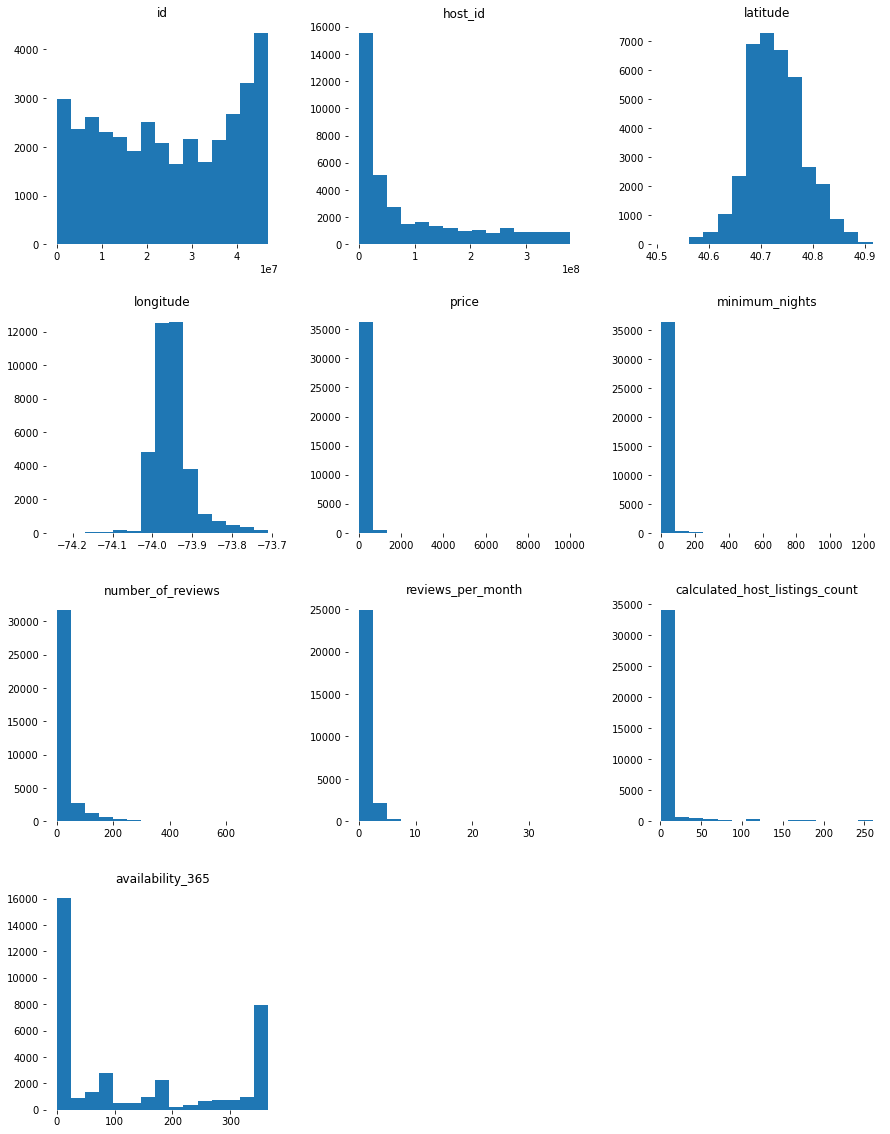

In [6]:
df.hist(bins = 15, figsize = ( 15, 20 ), grid=False);
#ax1.axis("off")


As variáveis `price` e `minimum_nights` estão com a visualização distorcida indicando que há possíveis outliers, ou seja, valores que estão fora do padrão de distribuição do conjunto de dados. 

### Outliers

#### Boxplot



O boxplot é uma forma padronizada para exibir a distribuição dos dados com base em 5 estatísticas:
*mínimo* ou *limite inferior*, *primeiro quartil*, *mediana*, *terceiro quartil* e *máximo* ou *limite superior*.

Do limite inferior ao limite superior temos toda a distribuição dos dados com exceção dos outliers.

O primeiro quartil compreende 25% dos dados, a mediana compreende 50% e o tereceiro quartil compreende 75% dos dados. 



<img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/1200px-Boxplot_vs_PDF.svg.png' width = 50%>


Para calcular os limites do boxplot e remover os outliers usamos o IQR score ou intervalo interquartil da seguinte maneira:

* 1 - Identificar o valor do primeiro quartil (Q1) e do terceiro quartil (Q3)
* 2 - Subtrair Q3 de Q1 para obter o IQR
* 3 - Definir o limite superior e o inferior através das fórmulas:
    * Superior:  Q3 + 1.5 * IQR
    * Inferior : Q1 - 1.5 * IQR
* 4 - Remover valores fora desse range, pois estes serão os outliers



<img src = 'https://miro.medium.com/max/875/1*0MPDTLn8KoLApoFvI0P2vQ.png' width = 50%>

### Identificando e Removendo Outliers


Dada a explicação a cima, será investigado a presença de outlier através do boxplot e, se houver, serão tratados. Faremos o mesmo procedimento para as duas variáveis: `price` e `minimum_nights`. 

#### Price

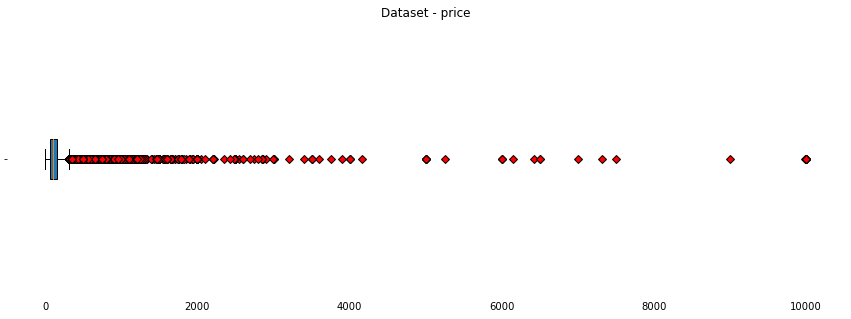

In [7]:
# Gráfico Antes
fig = plt.figure( figsize = (15,5) )
specs = gridspec.GridSpec(ncols = 1, nrows=1, figure = fig )
ax1 = fig.add_subplot(specs[0,0])
ax1.set_title( 'Dataset - price')
ax1.tick_params(bottom=False)
green_diamond = dict(markerfacecolor='r', marker='D')
ax1.boxplot(df.price, vert = False, patch_artist=True, labels = [''], flierprops=green_diamond);



In [8]:
# Identificando os outliers
# Definindo IQR
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price

# Definindo os limites
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print( "Q1: {}".format(q1_price))
print( "Q3: {} ".format(q3_price))
print( "IQR: {} \n".format(IQR_price))

print( "O limite superior é: {}".format(sup_price) )
print( "O limite inferior é: {}\n".format(inf_price) )

# compreendendo o efeito da remoção
print( 'O dataset contém {} linhas'.format( df.shape[0] ) )
print( 'Serão removidas {} linhas '.format( df.loc[ ( df.price > sup_price ) | ( df.price < inf_price ) ].shape[0] ))
print( 'Isso corresponde a {:.2f}% dos dados'.format(
    (df.loc[ ( df.price > sup_price ) | ( df.price < inf_price )].shape[0]) / ( df.shape[0] ) * 100 ) )

#Criando cópia do df original para comparação
df_original = df.copy()

Q1: 61.0
Q3: 159.0 
IQR: 98.0 

O limite superior é: 306.0
O limite inferior é: -86.0

O dataset contém 36923 linhas
Serão removidas 2300 linhas 
Isso corresponde a 6.23% dos dados


Uma vez identificado que, de fato, há outliers podemos dar início ao tratamento. Faremos da maneira mais simples possível: **Removendo-os.**

Removeremos também as linhas em que o valor cobrado por aluguel é igual a zero, pois uma vez que estamos falando em alugar uma casa e pagar as taxas envolvidas para o Airbnb, não faz sentido não cobrar nada.

Os outliers encontrados correspondem a 6.23% dos dados. Embora seja um número considerável, por hora, não fará falta eliminar essas linhas.



In [9]:
# Removendo 
df.drop( df[ ( df.price > sup_price ) | ( df.price < inf_price ) | (df.price == 0)].index, axis=0, inplace=True)


Da mesma forma faremos para a variável `minimum_nights`

#### minimum_nights

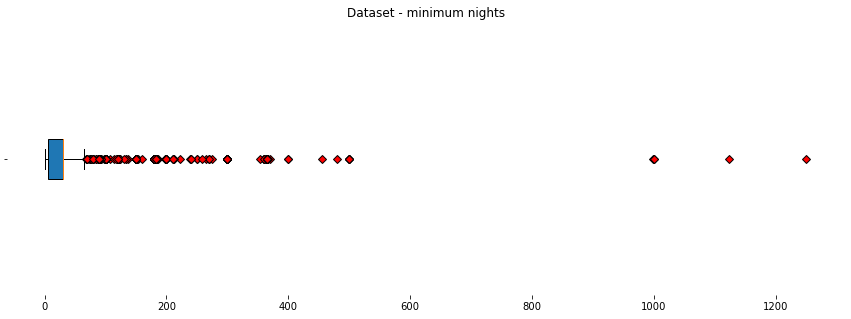

In [10]:
# Gráfico Antes
fig =  plt.figure( figsize = (15,5) )
specs = gridspec.GridSpec(ncols = 1, nrows=1, figure = fig )

green_diamond = dict(markerfacecolor='r', marker='D')

ax1 = fig.add_subplot(specs[0,0])

ax1.set_title( 'Dataset - minimum nights')
ax1.boxplot(df.minimum_nights, vert = False, patch_artist=True, labels = [''], flierprops=green_diamond);


In [11]:
Q1_minimum_night = df.minimum_nights.quantile(.25)
Q3_minimum_night = df.minimum_nights.quantile(.75)
IQR_minimum_nights = Q3_minimum_night - Q1_minimum_night

print( "Q1: {}".format(Q1_minimum_night))
print( "Q3: {} ".format(Q3_minimum_night))
print( "IQR: {} \n".format(IQR_minimum_nights))


#
sup_minimum_nights = Q3_minimum_night + 1.5 * IQR_minimum_nights
inf_minimum_nights = Q1_minimum_night - 1.5 * IQR_minimum_nights

print( "O limite superior é: {}".format(sup_minimum_nights) )
print( "O limite inferior é: {}\n".format(inf_minimum_nights) )


print( 'O dataset tem {} linhas'.format( df.shape[0]))
print( 'Serão removidas {} linhas '.format( df.loc[ (df['minimum_nights'] > sup_minimum_nights) |
                                                   (df['minimum_nights'] < inf_minimum_nights) ].shape[0] ))
print('Isso corresponde a {:.2f}% dos dados'.format(((df.loc[ (df['minimum_nights'] > sup_minimum_nights) | (df['minimum_nights'] < inf_minimum_nights) ].shape[0] ) / (df.shape[0])  * 100)))

Q1: 5.0
Q3: 30.0 
IQR: 25.0 

O limite superior é: 67.5
O limite inferior é: -32.5

O dataset tem 34600 linhas
Serão removidas 432 linhas 
Isso corresponde a 1.25% dos dados


In [12]:
# Removendo

df.drop(df.loc[ (df['minimum_nights'] > sup_minimum_nights) | (df['minimum_nights'] < inf_minimum_nights) ].index, axis=0, inplace=True)

### Antes e Depois da limpeza

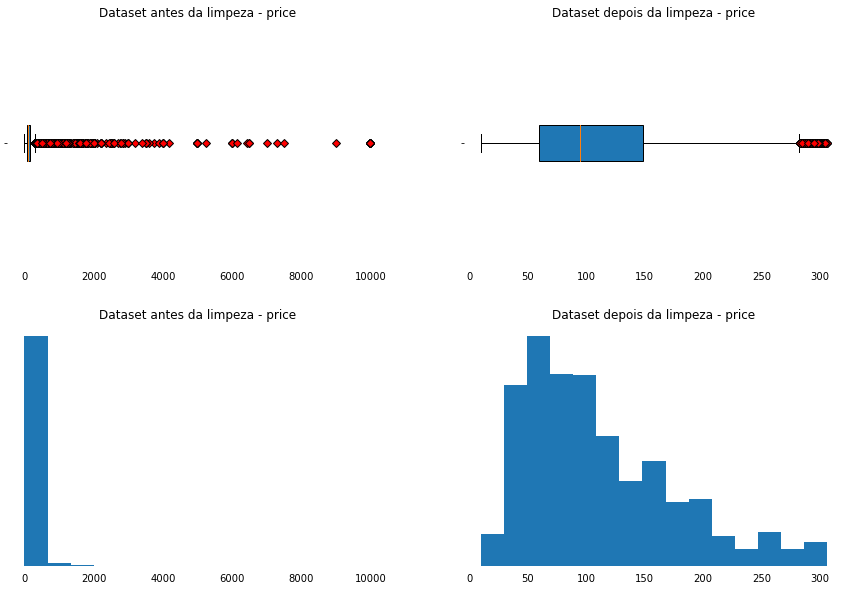

In [13]:
# PRICE Gráfico Depois
fig =  plt.figure( figsize = (15,10) )
specs = gridspec.GridSpec(ncols = 2, nrows=2, figure = fig )
specs.update(wspace=0.2, hspace=0.25)

ax1 = fig.add_subplot(specs[0,0])
ax2 = fig.add_subplot(specs[1,0])
ax3 = fig.add_subplot(specs[0,1])
ax4 = fig.add_subplot(specs[1,1])

green_diamond = dict(markerfacecolor='r', marker='D')

ax1.boxplot(df_original.price, vert = False, patch_artist=True, labels = [''], flierprops=green_diamond)
ax1.set_title('Dataset antes da limpeza - price')
ax1.tick_params(bottom=False)


ax2.hist(df_original.price, bins=15 )
ax2.set_title('Dataset antes da limpeza - price')
ax2.tick_params(bottom=False)
ax2.tick_params(left=False)
ax2.tick_params(labelleft=False)


ax3.boxplot(df.price, vert = False, patch_artist=True, labels = [''], flierprops=green_diamond)
ax3.set_title('Dataset depois da limpeza - price')
ax3.tick_params(bottom=False)



ax4.hist(df.price, bins=15 )
ax4.set_title('Dataset depois da limpeza - price')
ax4.tick_params(bottom=False)
ax4.tick_params(left=False)
ax4.tick_params(labelleft=False)



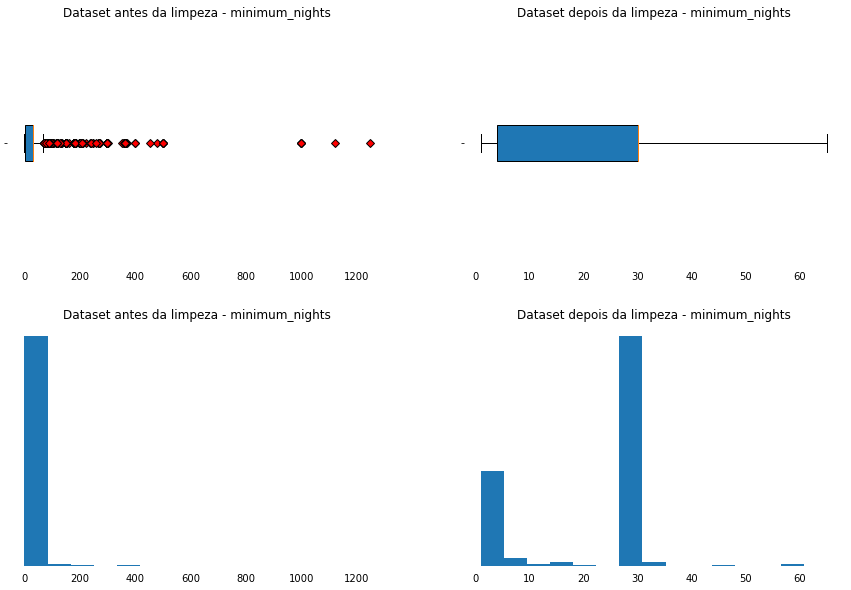

In [14]:
# Gráfico Depois
fig =  plt.figure( figsize = (15,10) )
specs = gridspec.GridSpec(ncols = 2, nrows=2, figure = fig )
specs.update(wspace=0.2, hspace=0.25)

ax1 = fig.add_subplot(specs[0,0])
ax2 = fig.add_subplot(specs[1,0])
ax3 = fig.add_subplot(specs[0,1])
ax4 = fig.add_subplot(specs[1,1])

green_diamond = dict(markerfacecolor='r', marker='D')


fig.patch.set_visible(False)

ax1.boxplot(df_original.minimum_nights, vert = False, patch_artist=True, labels = [''], flierprops=green_diamond);
ax1.set_title('Dataset antes da limpeza - minimum_nights')
ax1.tick_params(bottom=False)


ax2.hist(df_original.minimum_nights, bins=15 )
ax2.set_title('Dataset antes da limpeza - minimum_nights')
ax2.tick_params(bottom=False)
ax2.tick_params(left=False)
ax2.tick_params(labelleft=False)


ax3.boxplot(df.minimum_nights, vert = False, patch_artist=True, labels = [''], flierprops=green_diamond);
ax3.set_title('Dataset depois da limpeza - minimum_nights')
ax3.tick_params(bottom=False)


ax4.hist(df.minimum_nights, bins=15 );
ax4.set_title('Dataset depois da limpeza - minimum_nights')
ax4.tick_params(bottom=False)
ax4.tick_params(left=False)
ax4.tick_params(labelleft=False)

Feita as devidas remoções, podemos observar nitidamente a diferença entre antes e depois da remoção dos outliers através do boxplot e do histograma.

### **Q4. Qual a média dos preços de aluguel?**

In [15]:
 print( '$ {:.2f}'.format( df.price.mean() ))

$ 109.71


O Valor médio do aluguel em New York é de **$109,71**

### **Q4. Qual a correlação existente entre as variáveis**


#### Coeficiente de Correlação de Pearson

Para saber a correlação entre as variáveis usaremos o _Coeficiente de Correlação de Pearson_.
O _coeficiente de Pearson_ é um teste estatístico que mede a o grau de correlação entre duas variáveis, retornando um valor que varia entre +1 e -1.

* Um valor de Coeficiente +1 indica que há uma correlação positiva entre ambas as variáveis, ou seja, a medida que a variável A aumenta a variável B também aumenta.

* Já um valor de coeficiente -1 indica que também há uma correlação, porém, negativa. A medida qua a variável A aumenta a variável B diminui.

* Um valor igual a 0 indica que não é possível estabelecer uma correlação entre elas. O que não quer dizer que de fato não exista!

Então, quanto mais próximo de ±1,  maior é a correlação entre as variáveis analisadas.


In [16]:
# Matriz de correlação entre as variáveis.
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
           'calculated_host_listings_count', 'availability_365']].corr()
corr

price  minimum_nights  number_of_reviews  \
price                           1.000000        0.029859          -0.022868   
minimum_nights                  0.029859        1.000000          -0.244582   
number_of_reviews              -0.022868       -0.244582           1.000000   
reviews_per_month              -0.057185       -0.378606           0.707527   
calculated_host_listings_count  0.002254        0.115782          -0.102024   
availability_365                0.018001       -0.137321           0.157710   

                                reviews_per_month  \
price                                   -0.057185   
minimum_nights                          -0.378606   
number_of_reviews                        0.707527   
reviews_per_month                        1.000000   
calculated_host_listings_count          -0.061566   
availability_365                         0.204512   

                                calculated_host_listings_count  \
price                                                 0.002254   
minimum_nights                                        0.115782   
number_of_reviews                                    -0.102024   
reviews_per_month                                    -0.061566   
calculated_host_listings_count                        1.000000   
availability_365                                      0.196310   

                                availability_365  
price                                   0.018001  
minimum_nights                         -0.137321  
number_of_reviews                       0.157710  
reviews_per_month                       0.204512  
calculated_host_listings_count          0.196310  
availability_365                        1.000000

#### Heatmap

Um __heatmap__, ou mapa de calor, é uma ferramenta de visualização para análise de intensidade da ocorrência de um evento, variando a cor com a sua intensidade. Quanto maior a ocorrência de um evento mais forte será a cor, quanto menor a ocorrência, mais fraca será.

É exibido também como forma de gradiente para representar eventos inversamente proporcionais.


<img src='https://miro.medium.com/max/656/1*uCeBwObNhFL8AWXIU4-mDQ.png'>


Plotaremos esse mapa para nosso _coeficiente de Pearson_. Quanto mais próximo de **+1**, mais próximo do **azul**, indicando uma relação **positiva**. Quanto mais próximo de **-1**, mais próximo do **vermelho**, indicando uma correlação **negativa**.


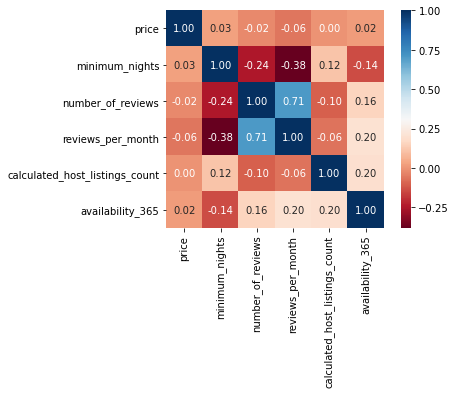

In [17]:
sns.heatmap( corr, cmap = 'RdBu', fmt = '.2f', square = True, linecolor = 'white', annot = True);

Podemos ver que as variáveis com maior correlação são `number_of_reviews` e `reviews_per_month`, o que faz sentido visto que elas se tratam da quantidades de avaliações por mês e quantidade de avaliação total.



### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**


In [18]:
df.room_type.value_counts() / df.shape[0] * 100

Entire home/apt    50.550222
Private room       47.052798
Shared room         1.861391
Hotel room          0.535589
Name: room_type, dtype: float64

Os imóveis mais alugados no Airbnbn em New York são os do tipo Casa ou apartamento, sendo esses equivalente a 50,55% e Quarto privado, sendo equivalente a 47,05%.

### **Q6. Qual a localidade mais cara do dataset?**


Aqui podemos tratar de duas maneiras: considerando apenas os **bairros**, ou considerando os **boroughs** pelo qual a cidade é dividida.

Considerar os bairros isoladamente nos levaria a um problema de pouquíssimas amostras por bairro, o que resultaria em uma visualização distorcida e errada quanto a realidade da cidade. Já considerar a divisão por boroughs faz mais sentido uma vez que a cidade é subdividida principalmente desta forma. Disso tiramos a importância do entendimento do negócio para analisar os dados.



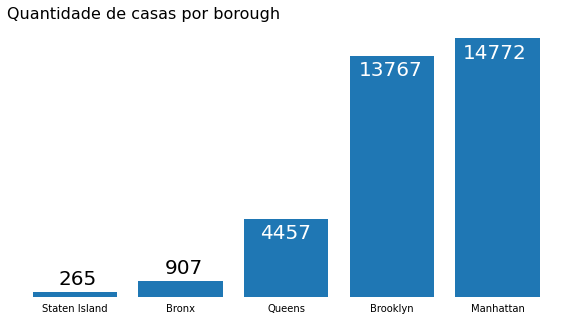

In [19]:
# Quantidade de amostra por boroughs

boroughs = df[['price', 'neighbourhood_group']].groupby('neighbourhood_group').count().sort_values(
    ['price'], ascending=True)

boroughs_valores = []
boroughs_labels = []

for i in boroughs.values:
    boroughs_valores.append(i[0])
    
for i in boroughs.index:
    boroughs_labels.append(i)



fig = plt.figure( figsize = (10, 5) )
specs = gridspec.GridSpec( ncols = 1, nrows = 1, figure = fig)
ax = fig.add_subplot(specs[0,0])
ax.set_title( 'Quantidade de casas por borough', loc='left', fontsize=16)

ax.annotate( boroughs_valores[4], xy=(3, 1),  xycoords='data',
            xytext=(0.93, 0.93), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top',
            fontsize=20,
            color="white")

ax.annotate( boroughs_valores[3], xy=(3, 1),  xycoords='data',
            xytext=(0.745, 0.87), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top',
            fontsize=20,
            color="white")

ax.annotate( boroughs_valores[2], xy=(3, 1),  xycoords='data',
            xytext=(0.545, 0.27), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top',
            fontsize=20,
            color="white")

ax.annotate( boroughs_valores[1], xy=(3, 1),  xycoords='data',
            xytext=(0.35, 0.14), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top',
            fontsize=20,
            color="black")

ax.annotate( boroughs_valores[0], xy=(3, 1),  xycoords='data',
            xytext=(0.16, 0.1), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top',
            fontsize=20,
            color="black")

plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=True, left=False, labelleft = False)


ax.bar(boroughs_labels, boroughs_valores );




Podemos observar que **Manhattan e Brooklyn tem a maior quantidade de casas disponíveis** e **Staten Island é onde há a menor quantidade de casas disponíveis para locação**.


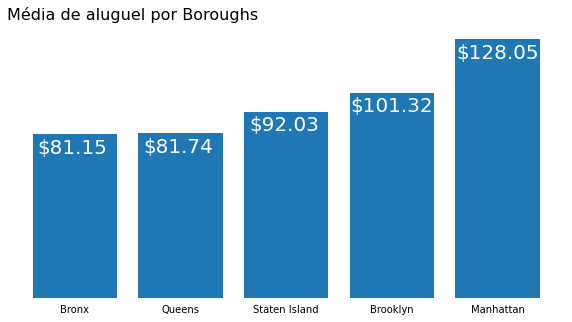

In [20]:
# Média de aluguel por borough

boroughs = df[['price', 'neighbourhood_group']].groupby('neighbourhood_group').mean().sort_values(
    ['price'], ascending=True)

boroughs_valores = []
boroughs_labels = []

for i in boroughs.values:
    boroughs_valores.append(i[0])
    
for i in boroughs.index:
    boroughs_labels.append(i)



fig = plt.figure( figsize = (10, 5) )
specs = gridspec.GridSpec( ncols = 1, nrows = 1, figure = fig)
ax = fig.add_subplot(specs[0,0])
ax.set_title( 'Média de aluguel por Boroughs', loc='left', fontsize=16)

ax.annotate( '${:.2f}'.format(boroughs_valores[4]), xy=(3, 1),  xycoords='data',
            xytext=(0.953, 0.935), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top',
            fontsize=20,
            color="white")

ax.annotate( '${:.2f}'.format(boroughs_valores[3]), xy=(3, 1),  xycoords='data',
            xytext=(0.763, 0.74), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top',
            fontsize=20,
            color="white")

ax.annotate( '${:.2f}'.format(boroughs_valores[2]), xy=(3, 1),  xycoords='data',
            xytext=(0.56, 0.67), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top',
            fontsize=20,
            color="white")

ax.annotate( '${:.2f}'.format(boroughs_valores[1]), xy=(3, 1),  xycoords='data',
            xytext=(0.37, 0.59), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top',
            fontsize=20,
            color="white")

ax.annotate( '${:.2f}'.format(boroughs_valores[0]), xy=(3, 1),  xycoords='data',
            xytext=(0.18, 0.585), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top',
            fontsize=20,
            color="white")

plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=True, left=False, labelleft = False)


ax.bar(boroughs_labels, boroughs_valores );

**Manhattan é o borough com o aluguel mais caro**, o que é justificavel dada sua proximidade com pontos turísticos e prédios comerciais.

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**


A média de mínimo de noites para alugar um local é de 22 dias.

In [21]:
print('A média do mínimo de noites são de {:.0f} dias'.format( df.minimum_nights.mean() ))


A média do mínimo de noites são de 22 dias


In [22]:
imoveis_irregulares = df.loc[ (df.minimum_nights < 30) & (df.room_type == 'Entire home/apt') ].shape[0]
print('Imóveis irregulares: {}'.format(imoveis_irregulares))
print('\t\t   : {:.2f}%'.format(imoveis_irregulares/ df.shape[0] * 100))


Imóveis irregulares: 5363
		   : 15.70%


A média do mínimo de noites para a locação é de 22 dias.

Como já citado anteriormente a lei não permite que uma casa ou um apartamento sejam alugados por menos de 30 dias sem a presença do proprietário, e isso ocorre  **5363** vezes, totalizando **15,70%** dos dados.


## Q8. Plotando um mapa

Como no dataset também é fornecido informações como latitude e longitude é possível plotar dois tipos de gráfico, um gráfico de dispersão e um de mapa.

* O gráfico de dispersão ou scatter plot é um gráfico para verificar correlações complexas entre variáveis, é possível colocar uma variação da cor de acordo com o preço de cada casa.

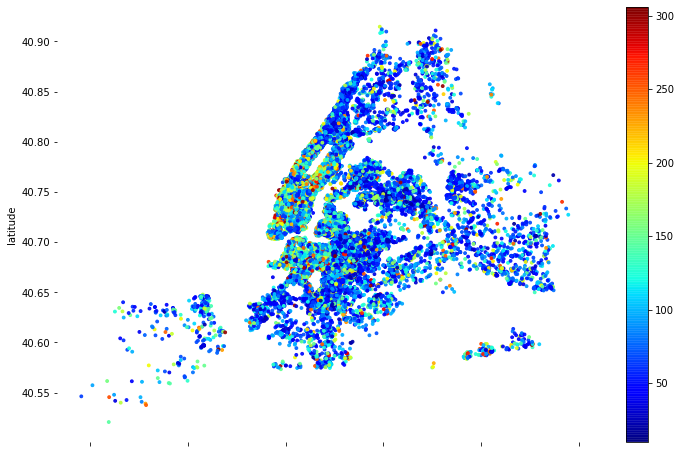

In [23]:
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.9, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

É possível verificar que há valores entre 100 e 150 dólares que estão um pouco mais agrupados em determinados locais do mapa. 

* Já o gráfico de mapa, utilizando plotly é intertivo e exibe as imagens ao estilo street view onde cada ponto representa uma casa e o tamanho do ponto representa o preço.

In [24]:
houses = df[['id', 'latitude', 'longitude', 'price']]

fig = px.scatter_mapbox(houses,
                        lat='latitude',
                       lon = 'longitude', 
                       size = 'price',
                       color_continuous_scale = px.colors.cyclical.IceFire,
                       size_max = 20,
                       zoom = 15)

fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout( height = 600, margin={'r': 0, 't':0, 'l':0, 'b':0}) 
fig.show()

## Conclusão

Apesar da breve análise na base de dados na base do Airbnb - New York, foi possível fazer um ótimo estudo sobre esses dados.

Na cidade de New York, fazer a análise pelos boroughts faz mais sentido do que analisar pelos bairros, pois a distribuição da cidade é feita dessa maneira. Saber isso nos ajudou na compreensão dos dados e facilitou a extração de insights através da visualização dos dados, pudemos ver através disso o **quão relevante é o entendimento do negócio** para poder analisar, pois não saber disso poderia nos levar a um caminho bem mais complicado que talvez nos levasse a erros.

Também foi possível encontrar outliers existentes em alguns atribuitos e fazer o tratamentos deles, demostrando através da **visualização** a importância **limpeza dos dados** para uma **Análise Exploratória de Dados.**

Por fim é bom salientar que esses dados são uma versão resumida, não sendo a ideal para uma analise mais aprofundada. Recomenda-se a versão completa que também é disponibilizada no [Portal Insider](http://insideairbnb.com/get-the-data.html) com mais variáveis disponíveis. 